In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df_final = pd.DataFrame()
for df in range(1,5):
    df = pd.read_csv(f'assng2_dataset - Sheet{df}.csv')
    df_final = pd.concat([df_final,df],ignore_index= True)
df = pd.read_csv('US_Accidents_Dec20_Updated_sheet1.csv')
df_final = pd.concat([df_final,df])
df_final.head()                                         # Mergin of all the dataframes

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,21-06-18 7:50,21-06-18 13:50,32.92393,-96.77563,32.92379,-96.76877,0.398,Ramp to US-75 - Accident. Two lanes blocked. H...,NaN,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
1,2,22-12-17 17:23,22-12-17 17:53,33.236919,-87.560966,33.236919,-87.560966,0,Accident on US-82 McFarland Blvd Westbound at ...,3200,...,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,Night,Night,Day,Day
2,2,11-12-19 15:27,11-12-19 16:38,33.02304,-117.07853,33.02304,-117.07853,0,At Rancho Bernardo Rd - Accident. Obstruction ...,NaN,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
3,2,09-10-19 15:06,09-10-19 15:39,38.366671,-122.712364,38.366671,-122.712364,0,At Commerce Blvd/Wilfred Ave - Accident.,NaN,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
4,2,03-12-19 23:44,04-12-19 1:56,38.597976,-121.383093,38.597976,-121.383093,0,At Arden Way - Accident.,NaN,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Night,Night,Night,Night


In [25]:
df_final.shape      #Shape of the final dataframe

(23637, 46)

In [26]:
df_final.isnull().sum() # Having a look over the null values

Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                   2313
End_Lng                   2313
Distance(mi)                 0
Description                  0
Number                   15428
Street                       0
Side                         0
City                         1
County                       0
State                        0
Zipcode                      9
Country                      0
Timezone                    24
Airport_Code                56
Weather_Timestamp          344
Temperature(F)             505
Wind_Chill(F)             9610
Humidity(%)                537
Pressure(in)               425
Visibility(mi)             540
Wind_Direction             476
Wind_Speed(mph)           2386
Precipitation(in)        10477
Weather_Condition          556
Amenity                      0
Bump                         0
Crossing                     0
Give_Way

In [27]:
df_final.columns    # because of too much columns i had a look on it to shorten them down to few 

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [28]:
dff= df_final[['Severity','Description','City','County','State','Country','Visibility(mi)','Start_Time', 'End_Time']]   # These are the selected few with necessary information 
dff.head()

,Severity,Description,City,County,State,Country,Visibility(mi),Start_Time,End_Time
0,3,Ramp to US-75 - Accident. Two lanes blocked. H...,Dallas,Dallas,TX,US,10,21-06-18 7:50,21-06-18 13:50
1,2,Accident on US-82 McFarland Blvd Westbound at ...,Northport,Tuscaloosa,AL,US,4,22-12-17 17:23,22-12-17 17:53
2,2,At Rancho Bernardo Rd - Accident. Obstruction ...,San Diego,San Diego,CA,US,10,11-12-19 15:27,11-12-19 16:38
3,2,At Commerce Blvd/Wilfred Ave - Accident.,Santa Rosa,Sonoma,CA,US,10,09-10-19 15:06,09-10-19 15:39
4,2,At Arden Way - Accident.,Sacramento,Sacramento,CA,US,0.25,03-12-19 23:44,04-12-19 1:56


In [29]:
dff.isnull().sum()                  # Checking the null values of the selected columns 

Severity            0
Description         0
City                1
County              0
State               0
Country             0
Visibility(mi)    540
Start_Time          0
End_Time            0
dtype: int64

In [30]:
dff1 = dff.dropna()     # I Thought of droping all the null values directly because its very small compared to the actually size of the dataset 

In [31]:
dct = {}
for key,dataf in dff1.groupby('City'):          #Using group by function to group the dataframe with respect to each unique city and 
                                                #the storing the value of the number of rows 
                                                # because the number of rows represent the number of accident occured
    dct[key] = len(dataf)


In [32]:
df = pd.DataFrame(dct.values(),dct.keys())
df['city'] = df.index
df =df.rename(columns = {0:'Accidents'})
df = df.sort_values(by  ='Accidents',ascending = False)

df1  = df.head()  #The city with maximum accident can be found using max function simply.

In [33]:
df1[df1['Accidents'] == max(df1.Accidents)]     #The city with maximum accident can be found using max function simply.

,Accidents,city
Houston,565,Houston


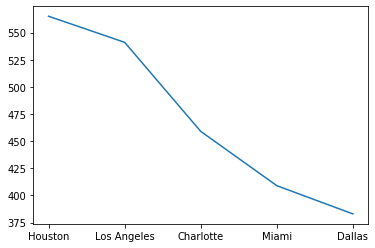

In [34]:
plt.plot(df1.city,df1.Accidents)
plt.show()